## Experiment Results - Data Analysis

### Loads all session trials variables from all participants and builds the data set for analytics

### Different data analysis processes are performed using this data set:
- Descriptive stats
- Data visualization
- Hypothesis testing
- Predictive models

 
Raúl Arrabales - May '17 - Change Blindness in Hierarchical Stimuli Project

In [381]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats 

In [166]:
# Path to dir where all result files are stored

PathToResults = 'results/'

In [167]:
# Read all data files from session 1, participants 1 to 9 
# (exported from edat files with E-DataAid)

df1 = pd.read_csv(PathToResults+'Ses1Usr1.csv', sep='\t')
df2 = pd.read_csv(PathToResults+'Ses1Usr2.csv', sep='\t')
df3 = pd.read_csv(PathToResults+'Ses1Usr3.csv', sep='\t')
df4 = pd.read_csv(PathToResults+'Ses1Usr4.csv', sep='\t')
df5 = pd.read_csv(PathToResults+'Ses1Usr5.csv', sep='\t')
df6 = pd.read_csv(PathToResults+'Ses1Usr6.csv', sep='\t')
df7 = pd.read_csv(PathToResults+'Ses1Usr7.csv', sep='\t')
df8 = pd.read_csv(PathToResults+'Ses1Usr8.csv', sep='\t')
df9 = pd.read_csv(PathToResults+'Ses1Usr9.csv', sep='\t')

In [207]:
# Available variables in Data Set: 

df1.columns

Index(['ExperimentName', 'Subject', 'Session', 'Age', 'Clock.Information',
       'Display.RefreshRate', 'Group', 'Handedness', 'Name', 'RandomSeed',
       'SessionDate', 'SessionTime', 'Sex', 'Block', 'blocklist',
       'blocklist.Cycle', 'blocklist.Sample', 'blocklistp', 'blocklistp.Cycle',
       'blocklistp.Sample', 'practisexp', 'Procedure[Block]', 'Running[Block]',
       'Trial', 'Accuracy', 'blank.DurationError', 'blank.OnsetDelay',
       'blank.OnsetTime', 'changecorrect', 'changedetected', 'changetype',
       'firstG', 'firstL', 'matrix1.ACC', 'matrix1.CRESP',
       'matrix1.DurationError', 'matrix1.OnsetDelay', 'matrix1.OnsetTime',
       'matrix1.RESP', 'matrix1.RT', 'matrix1.RTTime', 'Procedure[Trial]',
       'Rating', 'rating.ACC', 'rating.CRESP', 'rating.DurationError',
       'rating.OnsetDelay', 'rating.OnsetTime', 'rating.RESP', 'rating.RT',
       'rating.RTTime', 'Running[Trial]', 's1', 's2', 's3', 's4', 's5', 's6',
       's7', 's8', 's9', 'secondG', 'sencond

In [168]:
# List of participants and trials 

print("Participant 1:\t " + df1['Name'][1] + ":\t " + str(len(df1)) + " trials.")
print("Participant 2:\t " + df2['Name'][1] + ":\t " + str(len(df2)) + " trials.")
print("Participant 3:\t " + df3['Name'][1] + ":\t " + str(len(df3)) + " trials.")
print("Participant 4:\t " + df4['Name'][1] + ":\t " + str(len(df4)) + " trials.")
print("Participant 5:\t " + df5['Name'][1] + ":\t " + str(len(df5)) + " trials.")
print("Participant 6:\t " + df6['Name'][1] + ":\t " + str(len(df6)) + " trials.")
print("Participant 7:\t " + df7['Name'][1] + ":\t " + str(len(df7)) + " trials.")
print("Participant 8:\t " + df8['Name'][1] + ":\t " + str(len(df8)) + " trials.")
print("Participant 9:\t " + df9['Name'][1] + ":\t " + str(len(df9)) + " trials.")

Participant 1:	 cris:	 199 trials.
Participant 2:	 maria:	 202 trials.
Participant 3:	 Raul:	 202 trials.
Participant 4:	 Vicky:	 202 trials.
Participant 5:	 pilar:	 202 trials.
Participant 6:	 Reme:	 202 trials.
Participant 7:	 paula:	 205 trials.
Participant 8:	 JuanCarlos:	 206 trials.
Participant 9:	 Marta:	 206 trials.


In [169]:
# Join all participant data in one dataframe

frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
trials_df = pd.concat(frames)

print("A total of " + str(len(trials_df)) + " trials have been recorded")

A total of 1826 trials have been recorded


In [455]:
# Remove all practice trials

trials_df = trials_df[trials_df['practisexp'] != 'practice']
# trials_df.describe()
print("Experimental trials: " + str(len(trials_df)) + ".")

Experimental trials: 1790.


In [457]:
# Remove RT outliers (response times out of reasonable range)

trials_df = trials_df[trials_df['matrix1.RT'] < 40000]  # More than 1 minute: 9 trials removed. 
trials_df = trials_df[trials_df['matrix1.RT'] > 150]    # Less than 150 ms: 4 trials removed. 
print("Experimental trials (outliers excluded): " + str(len(trials_df)) + ".")

Experimental trials (outliers excluded): 1783.


In [458]:
# Segment by change detection task accuracy 

trials_correct = trials_df[trials_df['Accuracy'] == 1]
trials_fail = trials_df[trials_df['Accuracy'] == 0]

print("Correct change detection trials: " + str(len(trials_correct)) + ".")
print("Wrong change detection trials: " + str(len(trials_fail)) + ".")
print("Accuracy: " + str(len(trials_correct)/len(trials_df)) + ".")

trials_df['Accuracy'].value_counts()

Correct change detection trials: 1741.
Wrong change detection trials: 42.
Accuracy: 0.9764441951766686.


1    1741
0      42
Name: Accuracy, dtype: int64

In [459]:
# Accuracy stats

trials_df['Accuracy'].describe()

count    1783.000000
mean        0.976444
std         0.151703
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Accuracy, dtype: float64

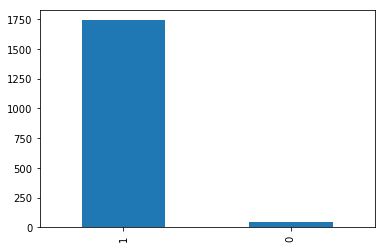

In [460]:
# Global accuracy plot

trials_df['Accuracy'].value_counts().plot(kind='bar')

In [461]:
# Accuracy for all participants: 

print("Participant 1 accuracy: " + str(trials_df[trials_df['Name'] == "cris"]['Accuracy'].mean()))
print("Participant 2 accuracy: " + str(trials_df[trials_df['Name'] == "maria"]['Accuracy'].mean()))
print("Participant 3 accuracy: " + str(trials_df[trials_df['Name'] == "Raul"]['Accuracy'].mean()))
print("Participant 4 accuracy: " + str(trials_df[trials_df['Name'] == "Vicky"]['Accuracy'].mean()))
print("Participant 5 accuracy: " + str(trials_df[trials_df['Name'] == "pilar"]['Accuracy'].mean()))
print("Participant 6 accuracy: " + str(trials_df[trials_df['Name'] == "Reme"]['Accuracy'].mean()))
print("Participant 7 accuracy: " + str(trials_df[trials_df['Name'] == "paula"]['Accuracy'].mean()))
print("Participant 8 accuracy: " + str(trials_df[trials_df['Name'] == "JuanCarlos"]['Accuracy'].mean()))
print("Participant 9 accuracy: " + str(trials_df[trials_df['Name'] == "Marta"]['Accuracy'].mean()))

Participant 1 accuracy: 0.9897435897435898
Participant 2 accuracy: 0.9195979899497487
Participant 3 accuracy: 0.99
Participant 4 accuracy: 0.9797979797979798
Participant 5 accuracy: 0.9949748743718593
Participant 6 accuracy: 0.9796954314720813
Participant 7 accuracy: 0.9441624365482234
Participant 8 accuracy: 1.0
Participant 9 accuracy: 0.99


In [462]:
# Total distribution of change type

trials_df['changetype'].value_counts()

L     606
G     603
GL    574
Name: changetype, dtype: int64

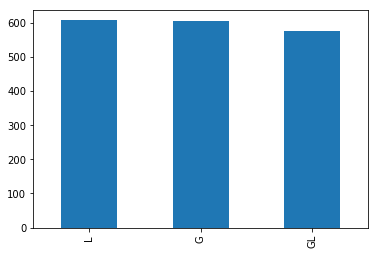

In [463]:
# Total distribution of change type - Plot

trials_df['changetype'].value_counts().plot(kind="bar")

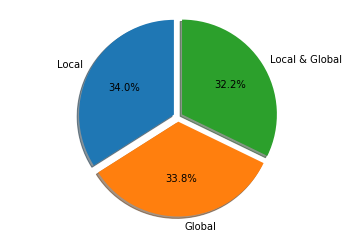

In [464]:
labels = 'Local', 'Global', 'Local & Global'
sizes = [trials_df['changetype'].value_counts()['L'], \
        trials_df['changetype'].value_counts()['G'], \
        trials_df['changetype'].value_counts()['GL']]
explode = (0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [465]:
# Save the figure
fig1.savefig('piechart.png')

In [466]:
# Response time for the three types of change

RT_L = trials_df[trials_df['changetype'] == 'L']['matrix1.RT']
RT_G = trials_df[trials_df['changetype'] == 'G']['matrix1.RT']
RT_GL = trials_df[trials_df['changetype'] == 'GL']['matrix1.RT']

In [467]:
# Response Time stats

print("MEAN:")
print("L changes RT mean: " + str(RT_L.mean()))
print("G changes RT mean: " + str(RT_G.mean()))
print("GL changes RT mean: " + str(RT_GL.mean()))
print()
print("MEDIAN:")
print("L changes RT median: " + str(RT_L.median()))
print("G changes RT median: " + str(RT_G.median()))
print("GL changes RT median: " + str(RT_GL.median()))

MEAN:
L changes RT mean: 11394.595709570956
G changes RT mean: 7246.9519071310115
GL changes RT mean: 7125.040069686411

MEDIAN:
L changes RT median: 10289.5
G changes RT median: 6200.0
GL changes RT median: 6206.0


In [468]:
# Response Time Stats
print("Local change detection RT Stats:")
RT_L.describe()

Local change detection RT Stats:


count      606.000000
mean     11394.595710
std       6110.392875
min       1965.000000
25%       7109.500000
50%      10289.500000
75%      14177.750000
max      39704.000000
Name: matrix1.RT, dtype: float64

In [469]:
# Response Time Stats
print("Global change detection RT Stats:")
RT_G.describe()

Global change detection RT Stats:


count      603.000000
mean      7246.951907
std       4471.897641
min        709.000000
25%       3808.000000
50%       6200.000000
75%       9631.500000
max      35265.000000
Name: matrix1.RT, dtype: float64

In [470]:
# Response Time Stats
print("Global and Local change detection RT Stats:")
RT_GL.describe()

Global and Local change detection RT Stats:


count      574.000000
mean      7125.040070
std       3984.929786
min        278.000000
25%       3948.000000
50%       6206.000000
75%       9729.000000
max      26800.000000
Name: matrix1.RT, dtype: float64

Local change detection response time


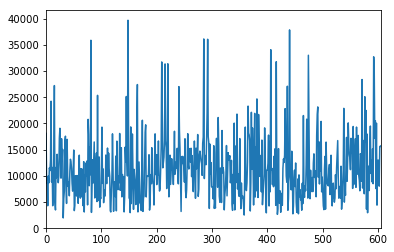

In [471]:
# RT Plots

print("Local change detection response time")
RT_L.plot(use_index=False)

Global change detection response time


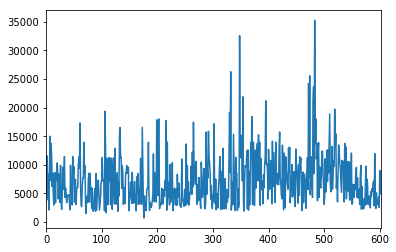

In [472]:
# RT Plots

print("Global change detection response time")
RT_G.plot(use_index=False)

Global and Local change detection response time


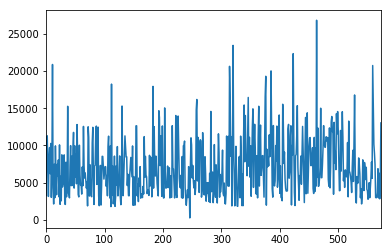

In [473]:
# RT Plots

print("Global and Local change detection response time")
RT_GL.plot(use_index=False)

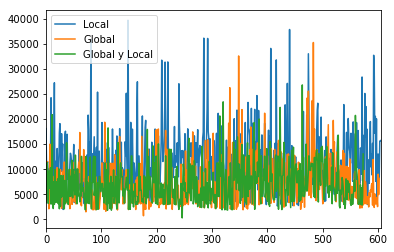

In [474]:
# RT Plots

RT_L.plot(use_index=False, legend=True, label="Local")
RT_G.plot(use_index=False, legend=True, label="Global")
RT_GL.plot(use_index=False, legend=True, label="Global y Local")

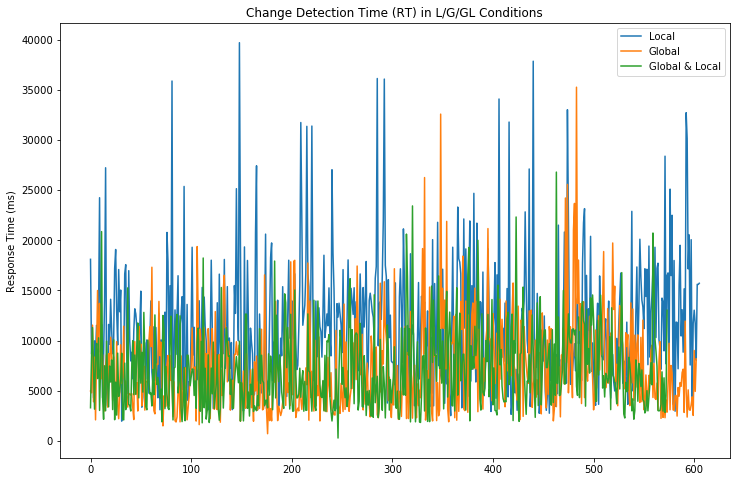

In [475]:
# RT Plots 

fig2 = plt.figure(2, figsize=(12, 8))
ax = fig2.add_subplot(111)

ax.plot(RT_L.values, '-', label="Local")
ax.plot(RT_G.values, '-', label="Global")
ax.plot(RT_GL.values, '-', label="Global & Local")
ax.legend(loc="upper right")
plt.title('Change Detection Time (RT) in L/G/GL Conditions')
plt.ylabel('Response Time (ms)')
plt.show()

In [476]:
# Save the figure
fig2.savefig('RTs.png')

In [477]:
int(RT_L.values.mean())

11394

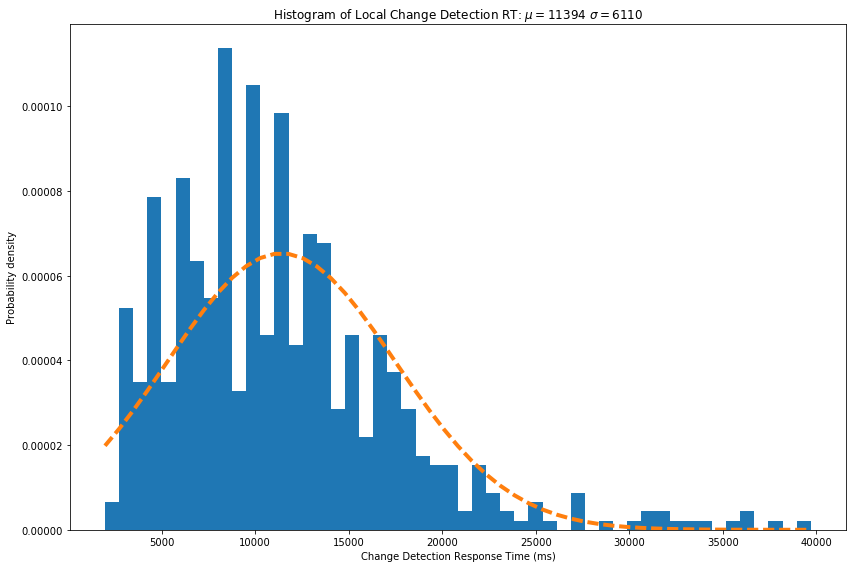

In [478]:
# Hist for Local RT serie

num_bins = 50

fig3 = plt.figure(3, figsize=(12, 8))
ax = fig3.add_subplot(111)

# the histogram of the data
n, bins, patches = ax.hist(RT_L.values, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, int(RT_L.values.mean()), int(RT_L.std()))
ax.plot(bins, y, '--',linewidth=4)
ax.set_xlabel('Change Detection Response Time (ms)')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of Local Change Detection RT: $\mu=' + 
             str(int(RT_L.values.mean())) + 
             '$ $\sigma= ' + str(int(RT_L.std())) + '$')
# Tweak spacing to prevent clipping of ylabel
fig3.tight_layout()
plt.show()

In [479]:
# Save the figure
fig3.savefig('RT_L_hist.png')

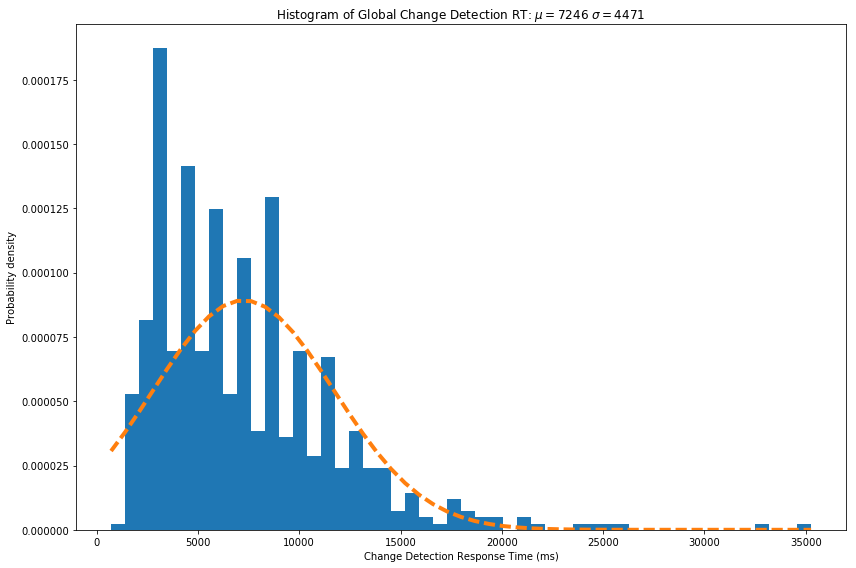

In [480]:
# Hist for Global RT serie

num_bins = 50

fig4 = plt.figure(4, figsize=(12, 8))
ax = fig4.add_subplot(111)

# the histogram of the data
n, bins, patches = ax.hist(RT_G.values, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, int(RT_G.values.mean()), int(RT_G.std()))
ax.plot(bins, y, '--', linewidth=4)
ax.set_xlabel('Change Detection Response Time (ms)')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of Global Change Detection RT: $\mu=' + 
             str(int(RT_G.values.mean())) + 
             '$ $\sigma= ' + str(int(RT_G.std())) + '$')

# Tweak spacing to prevent clipping of ylabel
fig4.tight_layout()
plt.show()

In [481]:
# Save the figure
fig4.savefig('RT_G_hist.png')

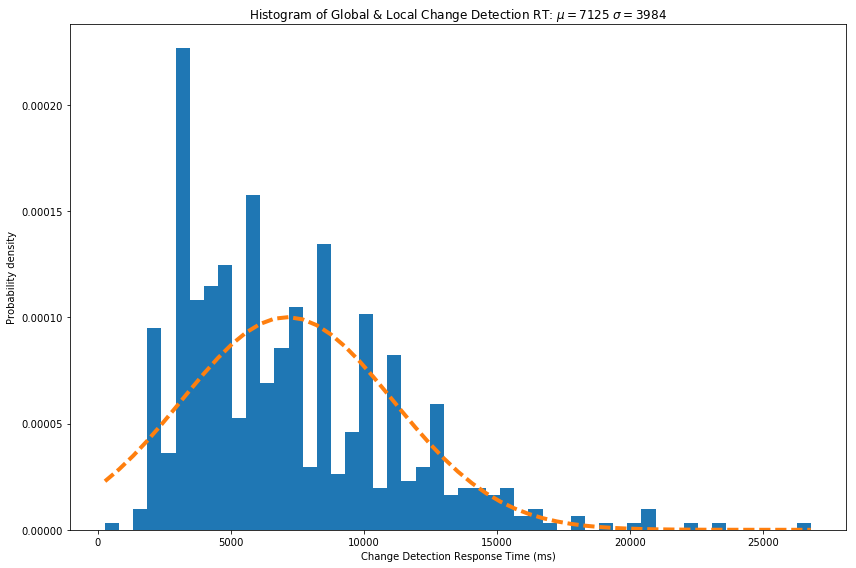

In [488]:
# Hist for Global & Lcoal RT serie

num_bins = 50

fig5 = plt.figure(5, figsize=(12, 8))
ax = fig5.add_subplot(111)

# the histogram of the data
n, bins, patches = ax.hist(RT_GL.values, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, int(RT_GL.values.mean()), int(RT_GL.std()))
ax.plot(bins, y, '--', linewidth=4)
ax.set_xlabel('Change Detection Response Time (ms)')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of Global & Local Change Detection RT: $\mu=' + 
             str(int(RT_GL.values.mean())) + 
             '$ $\sigma= ' + str(int(RT_GL.std())) + '$')

# Tweak spacing to prevent clipping of ylabel
fig5.tight_layout()
plt.show()

In [483]:
# Save the figure
fig5.savefig('RT_GL_hist.png')

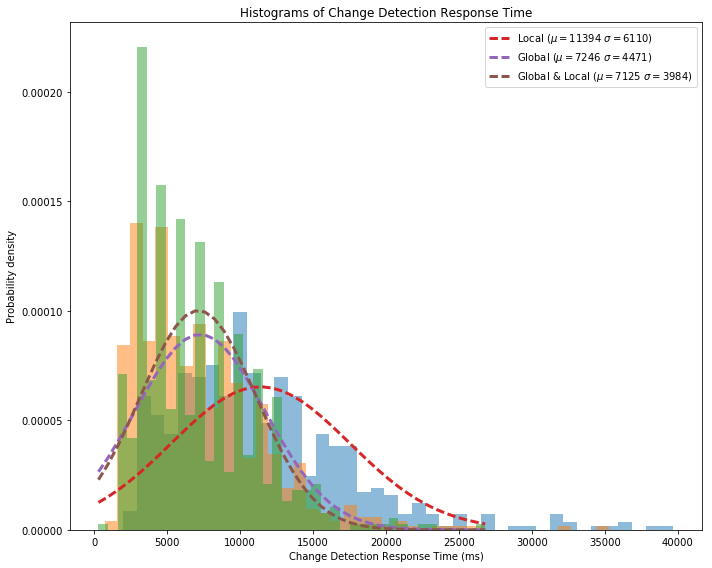

In [507]:
# Hist for all RT series

num_bins = 40

fig6 = plt.figure(6, figsize=(10, 8))
ax = fig6.add_subplot(111)

# the histogram of the data
n, bins, patches = ax.hist(RT_L.values, num_bins, alpha=0.5, normed=1)
n, bins, patches = ax.hist(RT_G.values, num_bins, alpha=0.5, normed=1)
n, bins, patches = ax.hist(RT_GL.values, num_bins, alpha=0.5, normed=1)

y = mlab.normpdf(bins, int(RT_L.values.mean()), int(RT_L.std()))
ax.plot(bins, y, '--', linewidth=3, label=r'Local ($\mu=' + str(int(RT_L.values.mean())) + '$ $\sigma= ' + str(int(RT_L.std())) + '$)')
y = mlab.normpdf(bins, int(RT_G.values.mean()), int(RT_G.std()))
ax.plot(bins, y, '--', linewidth=3, label=r'Global ($\mu=' + str(int(RT_G.values.mean())) + '$ $\sigma= ' + str(int(RT_G.std())) + '$)')
y = mlab.normpdf(bins, int(RT_GL.values.mean()), int(RT_GL.std()))
ax.plot(bins, y, '--', linewidth=3, label=r'Global & Local ($\mu=' + str(int(RT_GL.values.mean())) + '$ $\sigma= ' + str(int(RT_GL.std())) + '$)')

ax.set_xlabel('Change Detection Response Time (ms)')
ax.set_ylabel('Probability density')
ax.set_title('Histograms of Change Detection Response Time')
ax.legend(loc="upper right")
# Tweak spacing to prevent clipping of ylabel
fig6.tight_layout()
plt.show()

In [508]:
# Save the figure
fig6.savefig('RT_All_hist.png')

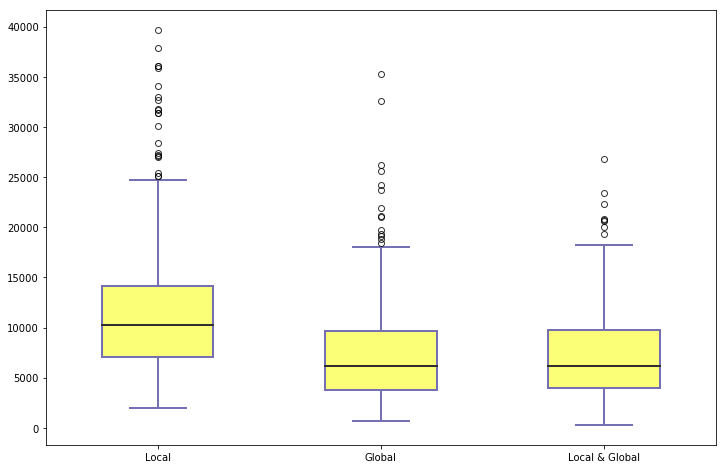

In [513]:
# RT Box plots 

fig7 = plt.figure(7, figsize=(12, 8))
ax = fig7.add_subplot(111)
xlabels=['Local', 'Global', 'Local & Global']
databp = [RT_L.values, RT_G.values, RT_GL.values]
bp = ax.boxplot(databp, widths=0.5, patch_artist=True)
# Colors
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#fbfe77' )
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
for median in bp['medians']:
    median.set(color='#2f2f2f', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.8)
ax.set_xticklabels(xlabels)
ax.set_xticks(np.arange(len(xlabels))+1)
plt.show()

In [512]:
# Save the figure
fig7.savefig('boxplots.png', bbox_inches='tight')

In [258]:
# One way ANOVA

print("One Way ANOVA RT Variable for Local, Global and Local&Global changes:")
print(stats.f_oneway(RT_L, RT_G, RT_GL))
print()
print("One Way ANOVA RT Variable for Local and Global changes:")
print(stats.f_oneway(RT_L, RT_G))
print()
print("One Way ANOVA RT Variable for Local and Local&Global changes:")
print(stats.f_oneway(RT_L, RT_GL))
print()
print("One Way ANOVA RT Variable for Global and Local&Global changes:")
print(stats.f_oneway(RT_G, RT_GL))

One Way ANOVA RT Variable for Local, Global and Local&Global changes:
F_onewayResult(statistic=132.82134897769126, pvalue=1.6645687492163979e-54)

One Way ANOVA RT Variable for Local and Global changes:
F_onewayResult(statistic=155.01536995475945, pvalue=1.415450946330469e-33)

One Way ANOVA RT Variable for Local and Local&Global changes:
F_onewayResult(statistic=193.7606575824241, pvalue=6.6780211574715879e-41)

One Way ANOVA RT Variable for Global and Local&Global changes:
F_onewayResult(statistic=0.94599477589930969, pvalue=0.33094073074383457)


In [262]:
# T Test 

print("T-Test RT Variable for Local and Global changes:")
print(stats.ttest_ind(RT_L, RT_G))
print()
print("T-Test RT Variable for Local and Local&Global changes:")
print(stats.ttest_ind(RT_L, RT_GL))
print()
print("T-Test RT Variable for Global and Local&Global changes:")
print(stats.ttest_ind(RT_G, RT_GL))

T-Test RT Variable for Local and Global changes:
Ttest_indResult(statistic=12.450516854924516, pvalue=1.4154509463312248e-33)

T-Test RT Variable for Local and Local&Global changes:
Ttest_indResult(statistic=13.919793733472638, pvalue=6.6780211574746936e-41)

T-Test RT Variable for Global and Local&Global changes:
Ttest_indResult(statistic=0.97262262769242169, pvalue=0.33094073074408947)


In [495]:
df1['matrix1.RT'].describe()

count      199.000000
mean      7883.256281
std       4424.886457
min          0.000000
25%       4580.000000
50%       7354.000000
75%       9998.000000
max      27231.000000
Name: matrix1.RT, dtype: float64

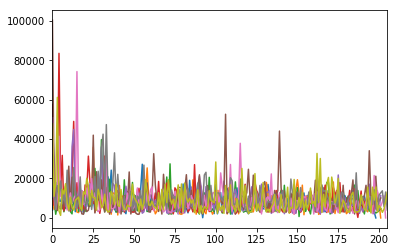

In [503]:
df1['matrix1.RT'].plot()
df2['matrix1.RT'].plot()
df3['matrix1.RT'].plot()
df4['matrix1.RT'].plot()
df5['matrix1.RT'].plot()
df6['matrix1.RT'].plot()
df7['matrix1.RT'].plot()
df8['matrix1.RT'].plot()
df9['matrix1.RT'].plot()